In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ad_clicks_df = pd.read_csv('ad_click_dataset.csv')
ad_clicks_df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [3]:
# drop columns with null value
ad_clicks_df = ad_clicks_df.dropna()
ad_clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 17 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                816 non-null    int64  
 1   full_name         816 non-null    object 
 2   age               816 non-null    float64
 3   gender            816 non-null    object 
 4   device_type       816 non-null    object 
 5   ad_position       816 non-null    object 
 6   browsing_history  816 non-null    object 
 7   time_of_day       816 non-null    object 
 8   click             816 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 63.8+ KB


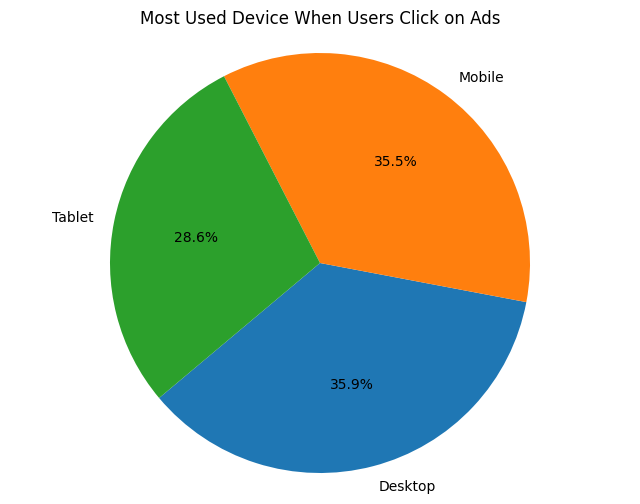

In [4]:
# checking what devices users use most frequently when they click on ads
device_counts = ad_clicks_df['device_type'].value_counts()

# plotting
plt.figure(figsize=(8, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=220)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Most Used Device When Users Click on Ads')
plt.show()

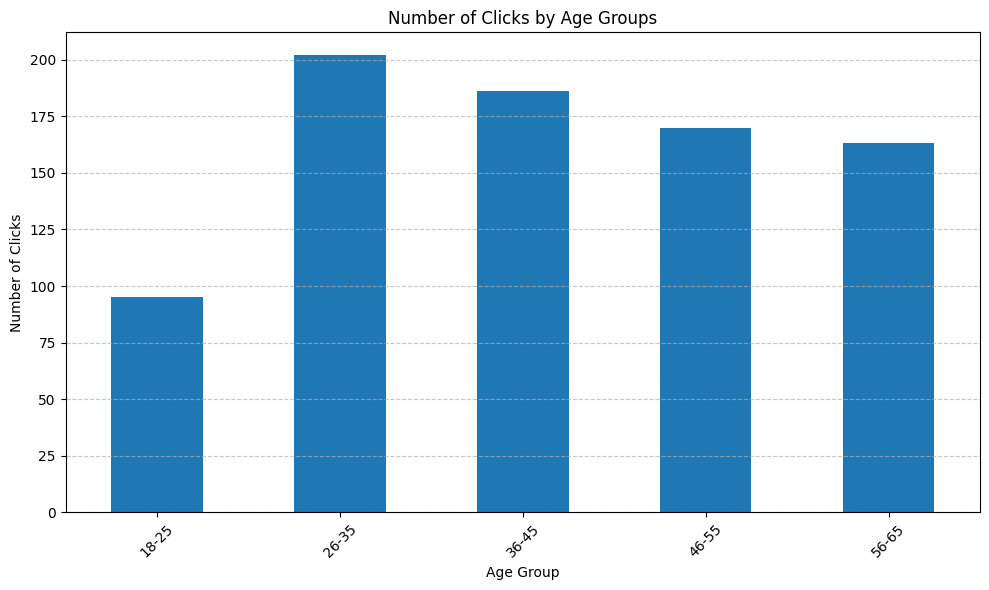

In [5]:
# making a bin to categorize age groups
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# grouping and allocating people into their corresponding age group
age_click_df = ad_clicks_df[['age', 'click']].copy()
age_click_df.loc[:, 'age_group'] = pd.cut(age_click_df['age'], bins=age_bins, labels=age_labels, right=False)

# count the total number of clicks in each age group
click_counts = age_click_df.groupby('age_group', observed=True)['click'].count()

# plotting
plt.figure(figsize=(10, 6))
click_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks by Age Groups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

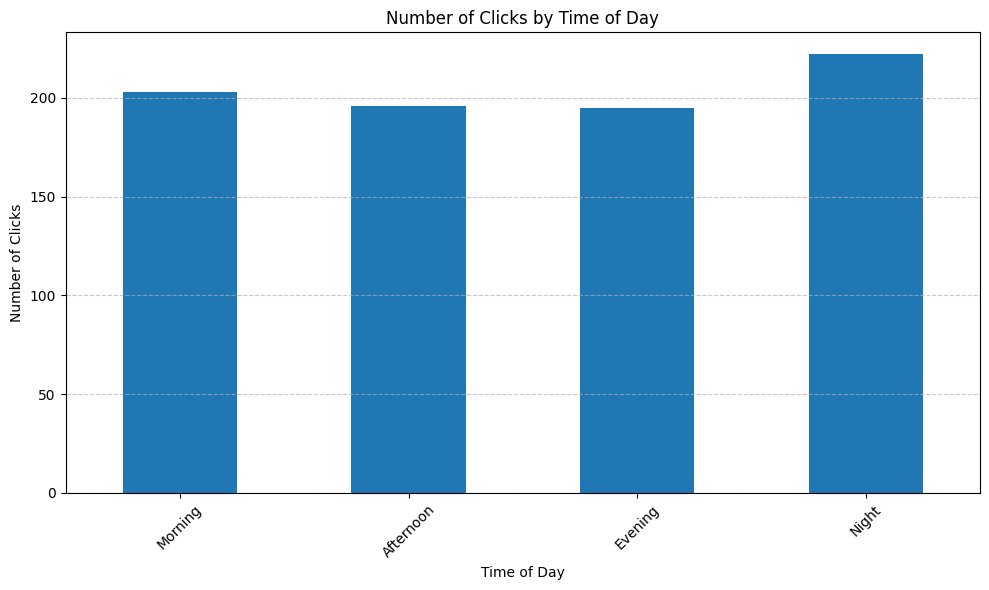

In [6]:
# creating labels for x-axis
time_of_day_labels = ['Morning', 'Afternoon', 'Evening', 'Night']

time_click_df = ad_clicks_df[['time_of_day', 'click']].copy()

# counting total number of clicks in each period of time of the day
click_counts = time_click_df.groupby('time_of_day')['click'].count()
click_counts = click_counts.reindex(time_of_day_labels, fill_value=0)

# plotting
plt.figure(figsize=(10, 6))
click_counts.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks by Time of Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()